## 20 Data Points

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train_Q1A.csv')

In [3]:
df.head()

,0,1
0,0.574620,-14.190397
1,-0.777297,21.172794
2,-1.055254,36.815845
3,-1.390366,54.473582
4,1.673447,-796.041623


In [4]:
df1 = df[0:20]
x = np.array(df1['0']).reshape(-1,1)
y = np.array(df1['1']).reshape(-1,1)

In [5]:
x.shape

(20, 1)

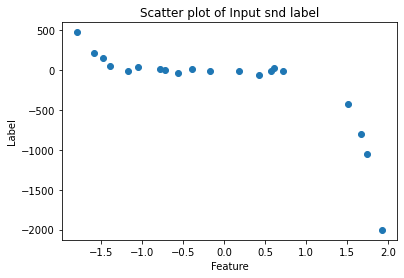

In [6]:
plt.scatter(x,y)
plt.title("Scatter plot of Input snd label")
plt.xlabel("Feature")
plt.ylabel("Label")
plt.show()

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

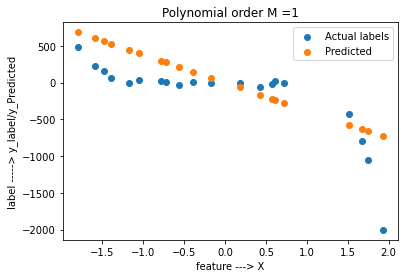

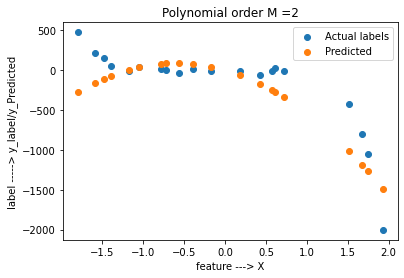

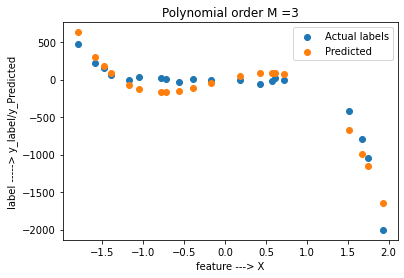

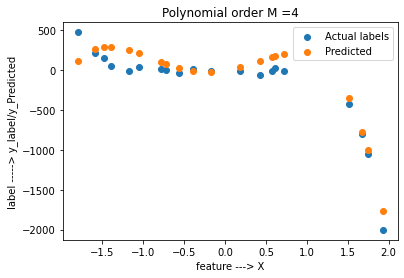

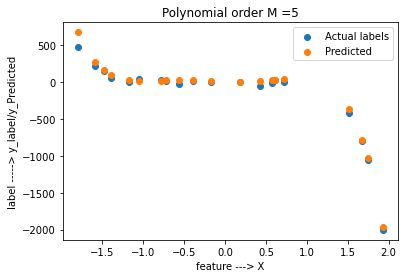

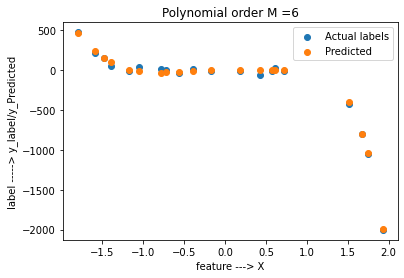

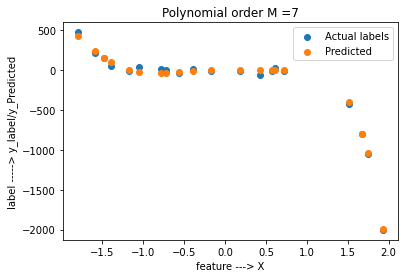

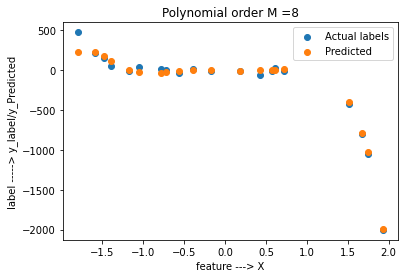

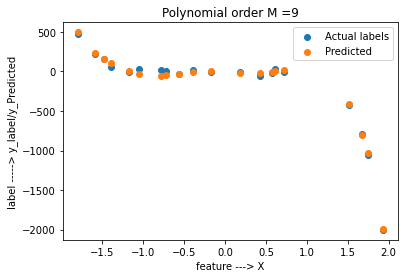

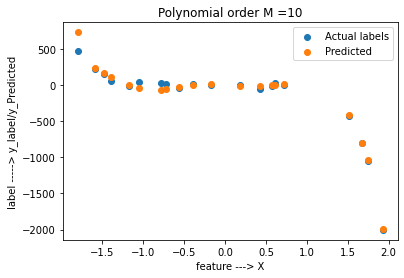

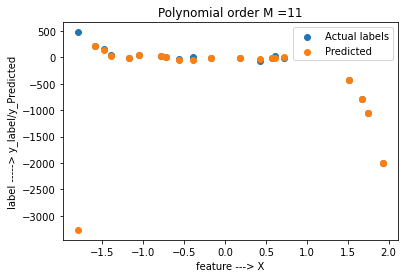

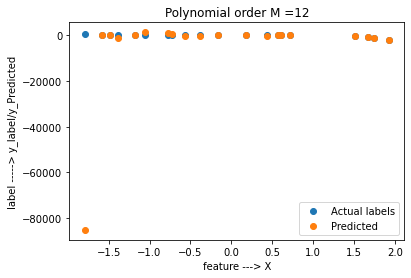

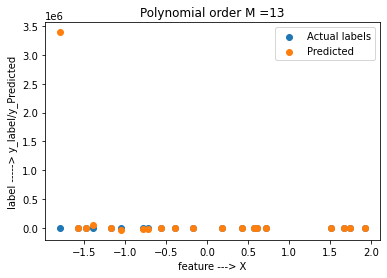

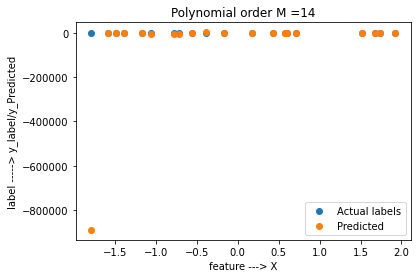

In [8]:
# Training root mean square error 
train_error = []

# Test root mean square error 
test_error = []
  
for d in range(1,15):

    # Creating polynomial data for degree 'd'
    polynomial_converter = PolynomialFeatures(degree=d,interaction_only =False,include_bias=True)
    poly_features = polynomial_converter.fit_transform(x)

    # Splitting new polynomial dataset into train, test
    x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # Training on new polynomial dataset
    model = LinearRegression()
    model.fit(x_train,y_train)
    
    scores = cross_validate(model,x_train,y_train,
                         scoring='neg_mean_squared_error',cv=5)
    
    # Prediction on both training and testing set
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    # Calculation of errors

    # Errors on Train Set
    train_rmse_error = np.sqrt(mean_squared_error(y_train,train_pred))
    # Errors on Test Set
    test_rmse_error = np.sqrt(mean_squared_error(y_test,test_pred))
    # Append errors to lists for plotting later
    train_error.append(train_rmse_error)
    test_error.append(test_rmse_error)
    
    coeff = np.array(model.coef_)
    predicted_y = []
    
    for j in range(len(df1['0'])):
        y_hat =0
        for i in range(d+1):
            y_hat = y_hat + coeff[0][i]*(df1['0'].iloc[j])**i
        predicted_y.append(y_hat)
        

    plt.scatter(x,y,label='Actual labels')
    plt.scatter(x,predicted_y,label ='Predicted')
    plt.xlabel('feature ---> X')
    plt.ylabel('label -----> y_label/y_Predicted')
    plt.title(f'Polynomial order M ={d}')
    plt.legend()
    plt.show()

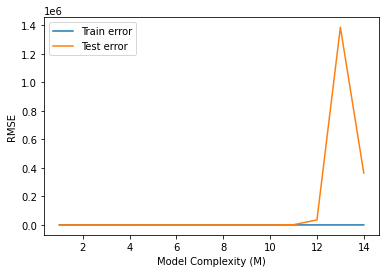

In [9]:
plt.plot(range(1,15),train_error,label='Train error')
plt.plot(range(1,15),test_error,label='Test error')
plt.xlabel("Model Complexity (M)")
plt.ylabel("RMSE")
plt.legend()
plt.show()

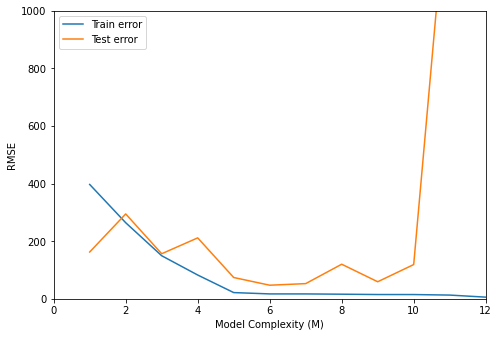

In [10]:
# After setting limits to y-axis
fig = plt.figure()
axes1 = fig.add_axes([0,0,1,1])
axes1.set_ylim(0,1000)
axes1.set_xlim(0,12)
plt.plot(range(1,15),train_error,label='Train error')
plt.plot(range(1,15),test_error,label='Test error')
plt.xlabel("Model Complexity (M)")
plt.ylabel("RMSE")
plt.legend()
plt.show()

In [11]:
final_poly_converter = PolynomialFeatures(degree=6,interaction_only =False,include_bias=True)
final_poly_features = final_poly_converter.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(final_poly_features, y, test_size=0.3, random_state=101)
    
# Training
final_model = LinearRegression()
final_model.fit(x_train,y_train)

scores = cross_validate(final_model,x_train,y_train,
                         scoring='neg_mean_squared_error',cv=5)

# Prediction on both training and testing set
train_pred_ = final_model.predict(x_train)
test_pred_ = final_model.predict(x_test)

# Calculation of errors
# Errors on Train Set
train_RMSE_ = np.sqrt(mean_squared_error(y_train,train_pred_))
print(f'Train root mean squared error is {train_RMSE_}')
# Errors on Test Set
test_RMSE_ = np.sqrt(mean_squared_error(y_test,test_pred_))
print(f'Test root mean squared error is {test_RMSE_}')

Train root mean squared error is 16.95927669992311
Test root mean squared error is 47.1883672236705


<Figure size 432x288 with 0 Axes>

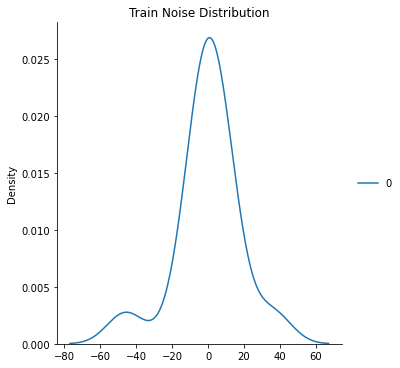

<Figure size 432x288 with 0 Axes>

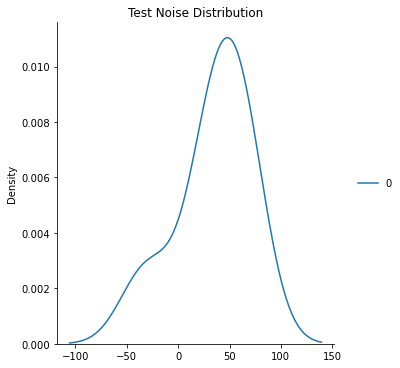

In [12]:
noise_train_ = y_train - train_pred_
noise_test_ = y_test - test_pred_
plt.figure()
sns.displot(noise_train_,kind = 'kde')
plt.title("Train Noise Distribution")
plt.show()
plt.figure()
sns.displot(noise_test_,kind = 'kde')
plt.title("Test Noise Distribution")
plt.show()



In [13]:
train_noise_mean_ = np.mean(noise_train_)
train_noise_var_ = np.var(noise_train_)
test_noise_mean_ = np.mean(noise_test_)
test_noise_var_ = np.var(noise_test_)


In [14]:
print(f"Train set ---> Mean = {train_noise_mean_}  ; variance = {train_noise_var_}")
print(f"Test set ---> Mean = {test_noise_mean_}  ; variance = {test_noise_var_}")

Train set ---> Mean = 6.597896832058073e-15  ; variance = 287.61706618455486
Test set ---> Mean = 34.198069143616685  ; variance = 1057.234068084393


In [15]:
model_coefficients = np.array(final_model.coef_)

In [16]:
model_coefficients[0]

array([  0.        ,   0.20862906, -44.48827644,  80.19760607,
        56.46875995, -71.41464834, -25.20788791])

In [17]:
final_poly_converter.get_feature_names(df1.columns)

['1', '0', '0^2', '0^3', '0^4', '0^5', '0^6']

In [18]:
# phi -----> Design Matrix
import numpy.matlib
opt_deg =6
phi = [[0] * (opt_deg+1) for i in range(len(df1))]

for i in range(len(df1)):
    for d in range(opt_deg+1):
        val = df1['0'].iloc[i]**d
        phi[i][d]=val

phi_transpose = [[phi[j][i] for j in range(len(df1))] for i in range(d+1)]
weights_ =np.matmul(np.matmul(np.linalg.inv(np.matmul(phi_transpose,phi)),phi_transpose),y)
weights_ =weights_.reshape(1,opt_deg+1)

In [19]:
# weights -----> coefficient of the polynomial of deg = opt_deg
weights_[0]

array([-14.72975461, -49.71679681,  37.36305104, 133.61045061,
        -8.22718971, -84.08926617, -12.62226398])

In [20]:
df_test = pd.read_csv('test_Q1A.csv')
X_test = np.array(df_test['0']).reshape(-1,1)
Y_test = np.array(df_test['1']).reshape(-1,1)

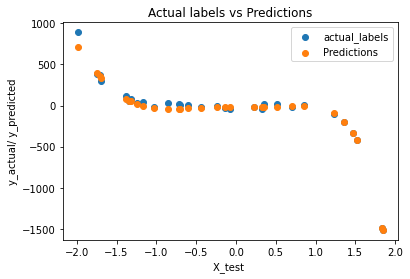

In [21]:
final_poly_converter = PolynomialFeatures(degree=6,interaction_only =False,include_bias=True)
final_poly_features = final_poly_converter.fit_transform(X_test)
pred = final_model.predict(final_poly_features)
plt.scatter(X_test,Y_test,label ='actual_labels')
plt.scatter(X_test,pred,label='Predictions')
plt.xlabel("X_test ")
plt.ylabel("y_actual/ y_predicted")
plt.title(f'Actual labels vs Predictions')
plt.legend()
plt.show()

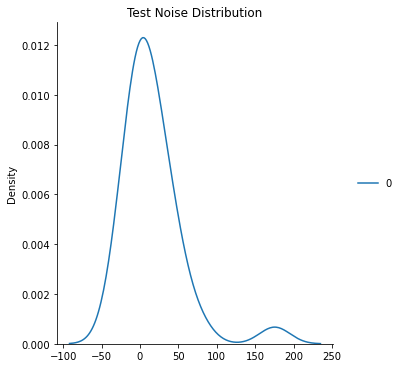

In [22]:
noise_test_ = Y_test-pred
sns.displot(noise_test_,kind = 'kde')
plt.title("Test Noise Distribution")
plt.show()

In [23]:
train_noise_mean_ = np.mean(noise_train_)
train_noise_var_ = np.var(noise_train_)

In [24]:
print(f"Train set ---> Mean = {train_noise_mean_}  ; variance = {train_noise_var_}")

Train set ---> Mean = 6.597896832058073e-15  ; variance = 287.61706618455486


## All/ 70 data points

In [25]:
x =np.array(df['0']).reshape(-1,1)
y = np.array(df['1']).reshape(-1,1)

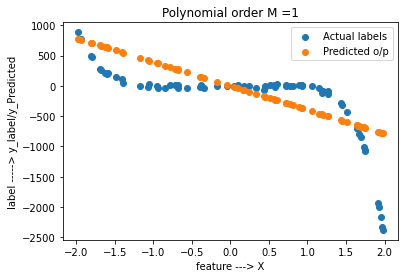

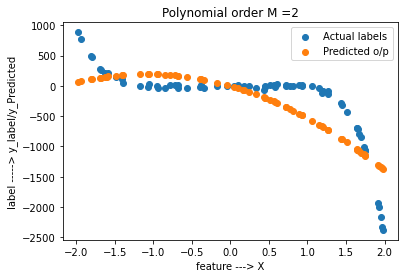

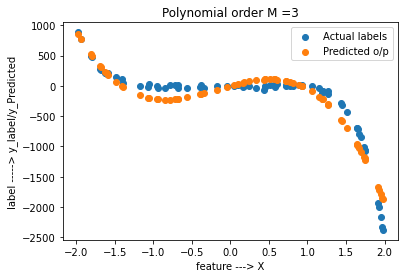

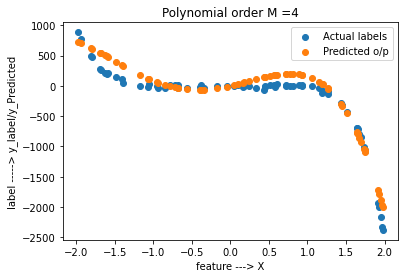

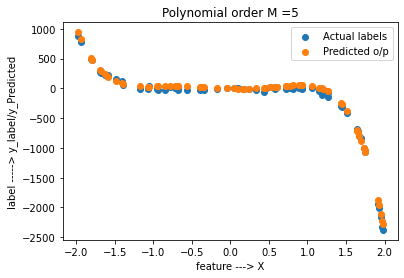

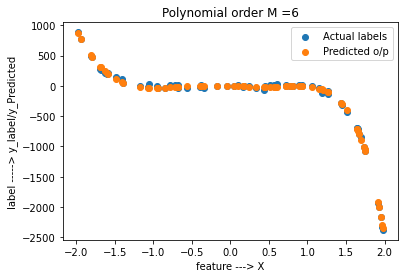

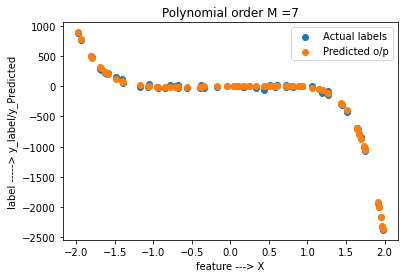

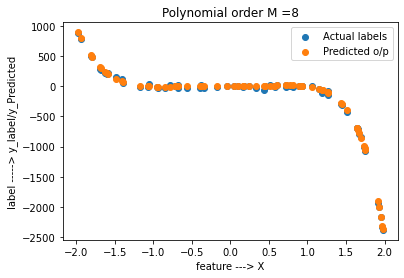

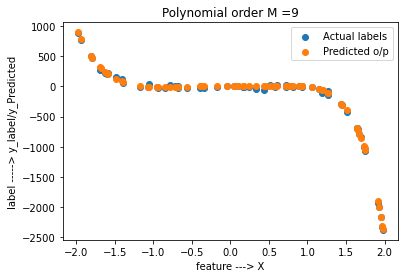

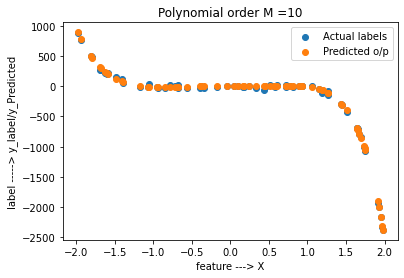

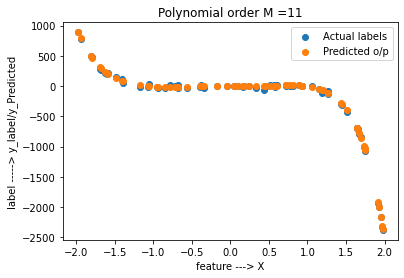

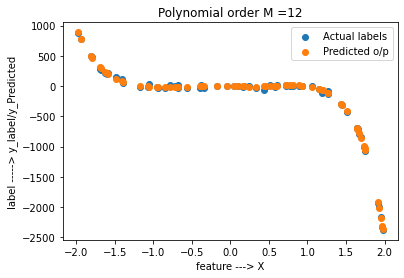

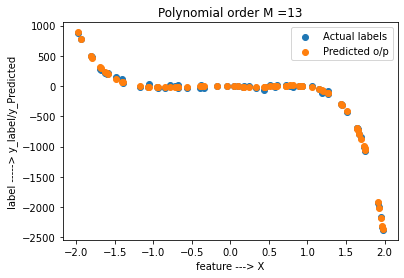

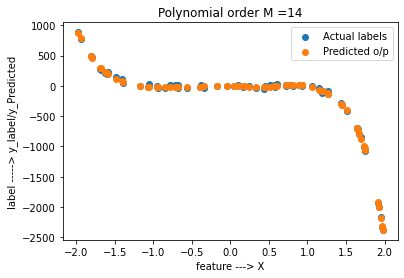

In [26]:
# Training root mean square error 
full_train_error = []

# Test root mean square error 
full_test_error = []
  
for d in range(1,15):

    # Creating polynomial data for degree 'd'
    full_polynomial_converter = PolynomialFeatures(degree=d,interaction_only =False,include_bias=True)
    full_poly_features = full_polynomial_converter.fit_transform(x)

    # Splitting new polynomial dataset into train, test
    x_train, x_test, y_train, y_test = train_test_split(full_poly_features, y, test_size=0.3, random_state=101)

    # Training on new polynomial dataset
    full_model = LinearRegression()
    full_model.fit(x_train,y_train)
    
    scores = cross_validate(full_model,x_train,y_train,
                         scoring='neg_mean_squared_error',cv=5)

    # Prediction on both training and testing set
    full_train_pred = full_model.predict(x_train)
    full_test_pred = full_model.predict(x_test)

    # Calculation of errors

    # Errors on Train Set
    full_train_rmse_error = np.sqrt(mean_squared_error(y_train,full_train_pred))
    # Errors on Test Set
    full_test_rmse_error = np.sqrt(mean_squared_error(y_test,full_test_pred))
    # Append errors to lists for plotting later
    full_train_error.append(full_train_rmse_error)
    full_test_error.append(full_test_rmse_error)
    
    coeff_ = np.array(full_model.coef_)
    predicted_y_ = []
    
    for j in range(len(df['0'])):
        y_hat =0
        for i in range(d+1):
            y_hat = y_hat + coeff_[0][i]*(df['0'].iloc[j])**i
        predicted_y_.append(y_hat)
        

    plt.scatter(x,y,label='Actual labels')
    plt.scatter(x,predicted_y_,label ='Predicted o/p')
    plt.xlabel('feature ---> X')
    plt.ylabel('label -----> y_label/y_Predicted')
    plt.title(f'Polynomial order M ={d}')
    plt.legend()
    plt.show()

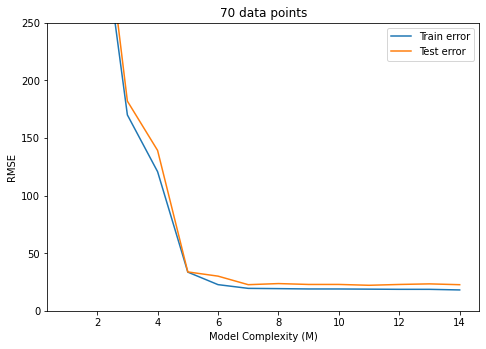

In [27]:
fig1 = plt.figure()
axes1 = fig1.add_axes([0,0,1,1])
axes1.set_ylim(0,250)
plt.plot(range(1,15),full_train_error,label='Train error')
plt.plot(range(1,15),full_test_error,label='Test error')
plt.xlabel("Model Complexity (M)")
plt.ylabel("RMSE")
plt.title('70 data points')
plt.legend()
plt.show()

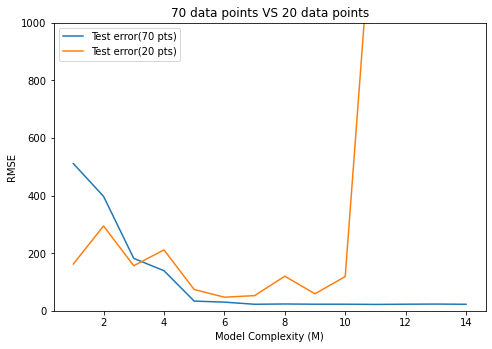

In [28]:
# Comparison of error plot for 20 data points and 70 data points
fig2 = plt.figure()
axes2 = fig2.add_axes([0,0,1,1])
axes2.set_ylim(0,1000)
plt.plot(range(1,15),full_test_error,label='Test error(70 pts)')
plt.plot(range(1,15),test_error,label='Test error(20 pts)')
plt.xlabel("Model Complexity (M)")
plt.ylabel("RMSE")
plt.title('70 data points VS 20 data points')
plt.legend()
plt.show()

In [29]:
# Selected Model Complexity and found out coefficients of polynomial

In [30]:
final_poly_converter_full = PolynomialFeatures(degree=7,interaction_only =False,include_bias=True)
final_poly_features_full = final_poly_converter_full.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(final_poly_features_full, y, test_size=0.3, random_state=101)
    
# Training
full_final_model = LinearRegression()
full_final_model.fit(x_train,y_train)

scores = cross_validate(full_final_model,x_train,y_train,
                         scoring='neg_mean_squared_error',cv=5)
# Prediction on both training and testing set
full_train_pred_ = full_final_model.predict(x_train)
full_test_pred_ = full_final_model.predict(x_test)

# Calculation of errors
# Errors on Train Set
train_RMSE_ = np.sqrt(mean_squared_error(y_train,full_train_pred_))
print(f'Train root mean squared error is {train_RMSE_}')

# Errors on Test Set
test_RMSE_ = np.sqrt(mean_squared_error(y_test,full_test_pred_))
print(f'Test root mean squared error is {test_RMSE_}')

Train root mean squared error is 19.47289559022754
Test root mean squared error is 22.672273108391504


#### Noise Distribution

<Figure size 432x288 with 0 Axes>

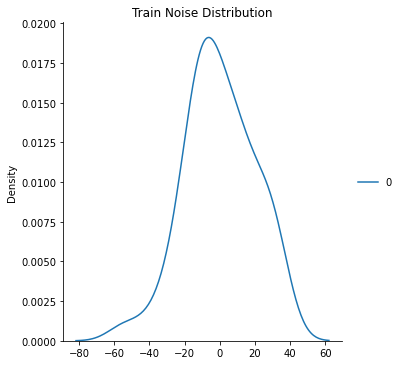

<Figure size 432x288 with 0 Axes>

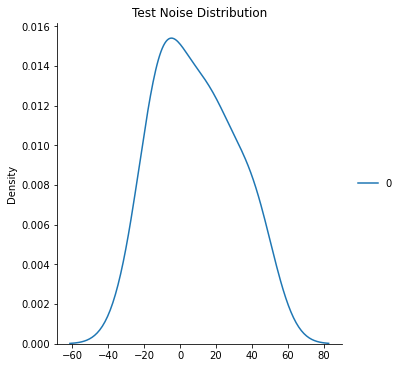

In [31]:
noise_train = y_train - full_train_pred_
noise_test = y_test - full_test_pred_
plt.figure()
sns.displot(noise_train,kind = 'kde')
plt.title("Train Noise Distribution")
plt.show()
plt.figure()
sns.displot(noise_test,kind = 'kde')
plt.title("Test Noise Distribution")
plt.show()

In [32]:
train_noise_mean = np.mean(noise_train)
train_noise_var = np.var(noise_train)
test_noise_mean = np.mean(noise_test)
test_noise_var = np.var(noise_test)

In [33]:
print(f"Train set ---> Mean = {train_noise_mean}  ; variance = {train_noise_var}")
print(f"Test set ---> Mean = {test_noise_mean}  ; variance = {test_noise_var}")

Train set ---> Mean = -2.2041325680721474e-14  ; variance = 379.1936626679032
Test set ---> Mean = 8.724233583406013  ; variance = 437.9197162836631


In [34]:
model_coefficients_ = np.array(full_final_model.coef_)

In [35]:
model_coefficients_

array([[  0.        ,   7.8054969 , -12.06558326,  22.96921415,
         19.52383156, -23.57539506, -16.62475056,  -9.51612292]])

##### ANALYTICAL SOLUTION

In [36]:
# phi -----> Design Matrix
import numpy.matlib
opt_deg = 7
phi = [[0] * (opt_deg+1) for i in range(len(df))]

for i in range(len(df)):
    for d in range(opt_deg+1):
        val = df['0'].iloc[i]**d
        phi[i][d]=val

phi_transpose = [[phi[j][i] for j in range(len(df))] for i in range(d+1)]
weights =np.matmul(np.matmul(np.linalg.inv(np.matmul(phi_transpose,phi)),phi_transpose),y)
weights =weights.reshape(1,opt_deg+1)

In [37]:
# weights -----> coefficient of the polynomial of deg = opt_deg
weights[0]

array([ -9.45053354,   8.10314309,   6.91754879,  12.80357873,
         8.76927798, -16.81572811, -15.12776902, -10.61724254])

In [38]:
df_test = pd.read_csv('test_Q1A.csv')
X_test = np.array(df_test['0']).reshape(-1,1)
Y_test = np.array(df_test['1']).reshape(-1,1)

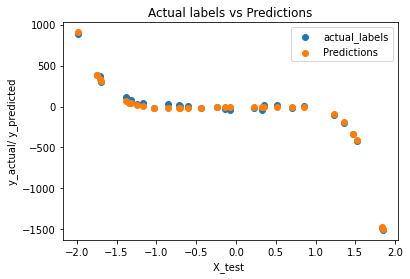

In [39]:
final_poly_converter_full = PolynomialFeatures(degree=7,interaction_only =False,include_bias=True)
final_poly_features_full = final_poly_converter_full.fit_transform(X_test)
pred = full_final_model.predict(final_poly_features_full)
plt.scatter(X_test,Y_test,label ='actual_labels')
plt.scatter(X_test,pred,label='Predictions')
plt.xlabel("X_test ")
plt.ylabel("y_actual/ y_predicted")
plt.title(f'Actual labels vs Predictions')
plt.legend()
plt.show()

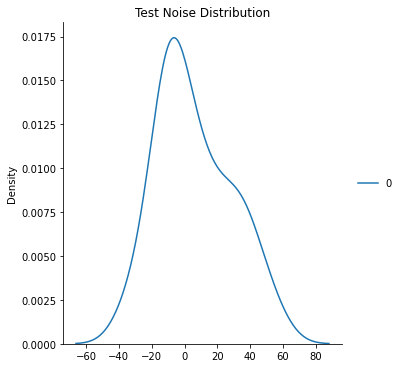

In [40]:
noise_test_ = Y_test-pred
sns.displot(noise_test_,kind = 'kde')
plt.title("Test Noise Distribution")
plt.show()

In [41]:
train_noise_mean_ = np.mean(noise_train_)
train_noise_var_ = np.var(noise_train_)

In [42]:
print(f"Train set ---> Mean = {train_noise_mean_}  ; variance = {train_noise_var_}")

Train set ---> Mean = 6.597896832058073e-15  ; variance = 287.61706618455486
